# Exploratory data analysis on happiness scores of topic_news and topic_tweets docs
Last modified: 2017-10-22

# Roadmap
1. Check happiness scores of topic_news and topic_tweets docs
2. Check word coverage of shed words on topic_news and topic_tweets docs
3. Check any special topic

# Steps

In [1]:
"""
Initialization
"""

'''
Standard modules
'''
import os
import pickle
import csv
import time
from pprint import pprint

'''
Analysis modules
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens 
import matplotlib.pyplot as plt
import pandas as pd


'''
Custom modules
'''
import config
import utilities

'''
Misc
'''
nb_name = '20171021-daheng-eda_topic_news_tweets_happiness'

## Check happiness scores of topic_news and topic_tweets docs

### Avg. happiness scores

In [2]:
%%time
"""
Compute h_avg scores for each topic_news and topic_tweets doc
"""

topics_h_avg_csv_file = os.path.join(config.FIG_DIR, 'topics_h_avg.updated.csv')

if 0 == 1:
    topics_h_avg_lst = []
    
    '''
    Recover pkl info
    '''
    with open(config.TOPICS_NEWS_SHED_WORDS_FREQ_DICT_PKL, 'rb') as f:
        topics_news_shed_words_freq_dict = pickle.load(f)
    
    with open(config.IND_HAPPS_DICT_PKL, 'rb') as f:
        ind_happs_dict = pickle.load(f)
    
    for topic_ind, topic in enumerate(config.MANUALLY_SELECTED_TOPICS_LST):
        topic_dict = {'topic_ind': topic_ind, 'topic_name': topic['name']}
        localtime = time.asctime(time.localtime(time.time()))
        print('({}/{}) processing topic: {} ... {}'.format(topic_ind+1,
                                                           len(config.MANUALLY_SELECTED_TOPICS_LST),
                                                           topic['name'],
                                                           localtime))
        
        '''
        Compute h_avg score for topic_news doc
        '''
        topic_news_shed_words_freq_dict = topics_news_shed_words_freq_dict[topic_ind]
        
        topic_dict['news_num'] = len(topic_news_shed_words_freq_dict.keys())
        
        topic_news_merged_freq_dict = utilities.merge_shed_words_freq_dicts(topic_news_shed_words_freq_dict.values())
        topic_news_h_avg = utilities.compute_h_score(topic_news_merged_freq_dict, ind_happs_dict)
        
        topic_dict['news_h_avg'] = topic_news_h_avg
        
        '''
        Compute h_avg score for topic_tweets doc
        '''
        topic_tweets_shed_words_freq_dict_pkl_file = os.path.join(config.TOPICS_TWEETS_SHED_WORDS_FREQ_DICT_PKLS_DIR,
                                                                  '{}.updated.dict.pkl'.format(topic_ind))
        with open(topic_tweets_shed_words_freq_dict_pkl_file, 'rb') as f:
            topic_tweets_shed_words_freq_dict = pickle.load(f)
        
        topic_dict['tweets_num'] = len(topic_tweets_shed_words_freq_dict.keys())
        
        topic_tweets_merged_freq_dict = utilities.merge_shed_words_freq_dicts(topic_tweets_shed_words_freq_dict.values())
        topic_tweets_h_avg = utilities.compute_h_score(topic_tweets_merged_freq_dict, ind_happs_dict)
        
        topic_dict['tweets_h_avg'] = topic_tweets_h_avg
        
        topics_h_avg_lst.append(topic_dict)
    
    topics_h_avg_df = pd.DataFrame(topics_h_avg_lst)
    topics_h_avg_df.to_csv(path_or_buf=topics_h_avg_csv_file,
                           columns=['topic_ind', 'topic_name', 'news_num', 'news_h_avg', 'tweets_num', 'tweets_h_avg'],
                           sep='\t',
                           quoting=csv.QUOTE_MINIMAL,
                           header=True,
                           index=False)
    print('Done')

(1/51) processing topic: Hillary_Clinton_email_controversy ... Mon Oct 23 16:25:46 2017
(2/51) processing topic: Iran_nuclear_deal ... Mon Oct 23 16:25:53 2017
(3/51) processing topic: ISIS_Jihadi_John_identity_reveal ... Mon Oct 23 16:26:19 2017
(4/51) processing topic: Ukraine_cease_fire ... Mon Oct 23 16:26:25 2017
(5/51) processing topic: Egypt_free_Al_Jazeera_journalist ... Mon Oct 23 16:26:29 2017
(6/51) processing topic: Keystone_XL_Pipeline_bill ... Mon Oct 23 16:26:30 2017
(7/51) processing topic: CIA_Torture_Report ... Mon Oct 23 16:26:31 2017
(8/51) processing topic: Obama_cybersecurity_plan ... Mon Oct 23 16:26:33 2017
(9/51) processing topic: DHS_funding_issue ... Mon Oct 23 16:26:37 2017
(10/51) processing topic: US_Cuba_relationship ... Mon Oct 23 16:26:39 2017
(11/51) processing topic: 2015_CPAC ... Mon Oct 23 16:26:54 2017
(12/51) processing topic: Iraq_free_ISIS_Tikrit ... Mon Oct 23 16:26:56 2017
(13/51) processing topic: Nigeria_Boko_Haram_terrorists ... Mon Oct 23 

#### Basic box-plots

In [3]:
"""
Load data
"""
if 1 == 1:
    topics_h_avg_csv_file = os.path.join(config.FIG_DIR, 'topics_h_avg.updated.csv')
    
    topics_h_avg_df = pd.read_csv(topics_h_avg_csv_file, sep='\t', quoting=csv.QUOTE_MINIMAL)
    
    topic_lst_df = pd.DataFrame(config.MANUALLY_SELECTED_TOPICS_LST)
    
    topics_h_avg_df['category'] = topic_lst_df['category']

In [4]:
with pd.option_context('display.max_columns', 7, 'display.max_colwidth', 50, 'expand_frame_repr', False):
    dis_lst = ['topic_ind', 'news_num', 'news_h_avg', 'tweets_num', 'tweets_h_avg', 'topic_name', 'category']
    display(topics_h_avg_df[dis_lst])

,topic_ind,news_num,news_h_avg,tweets_num,tweets_h_avg,topic_name,category
0,0,228,5.912027,367618,5.969572,Hillary_Clinton_email_controversy,politics
1,1,406,5.542578,1238107,5.812523,Iran_nuclear_deal,politics
2,2,101,5.649552,310280,5.962166,ISIS_Jihadi_John_identity_reveal,politics
3,3,84,5.353950,233999,5.414554,Ukraine_cease_fire,politics
4,4,50,5.463536,39845,5.832747,Egypt_free_Al_Jazeera_journalist,politics
5,5,55,5.709798,37041,5.456286,Keystone_XL_Pipeline_bill,politics
6,6,41,5.549009,84081,4.892545,CIA_Torture_Report,politics
7,7,73,5.845357,249609,5.855015,Obama_cybersecurity_plan,politics
8,8,45,5.518097,66855,5.790961,DHS_funding_issue,politics
9,9,235,5.871696,746329,5.986725,US_Cuba_relationship,politics


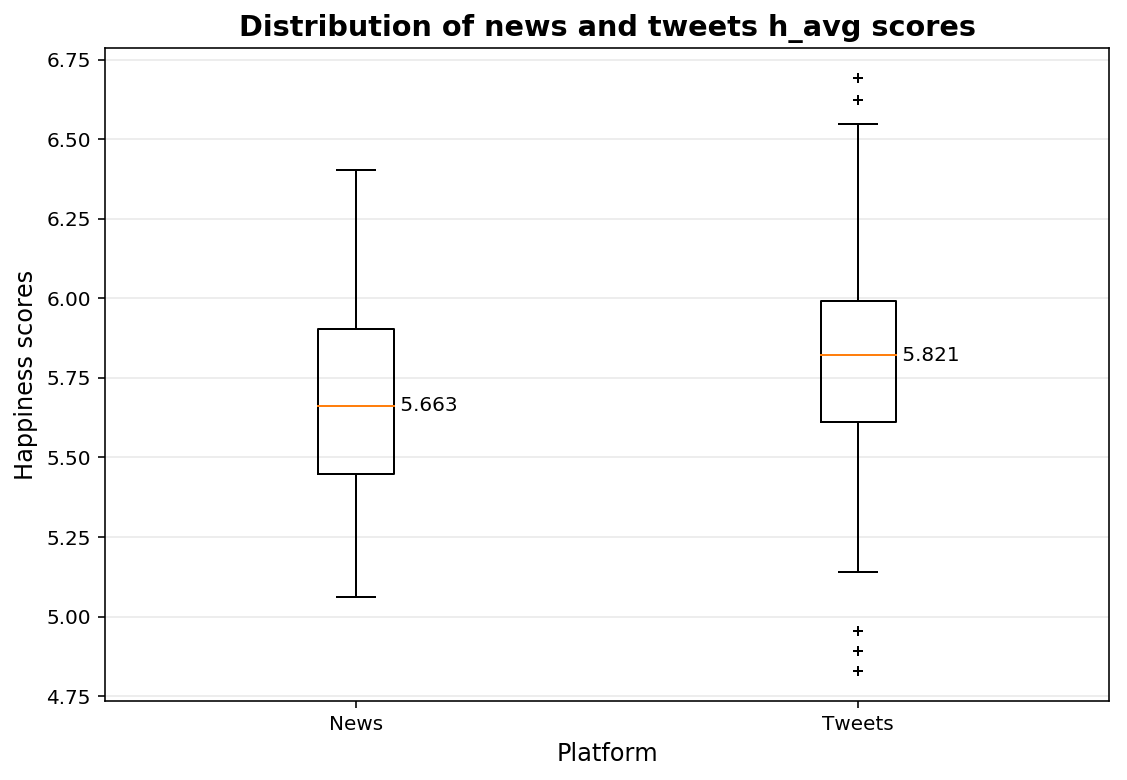

In [5]:
"""
Plot distribution of news_h_avg and tweets_h_avg
"""
if 1 == 1:
    '''
    Prepare data
    '''
    data = [topics_h_avg_df['news_h_avg'], topics_h_avg_df['tweets_h_avg']]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['News', 'Tweets'])
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Distribution of news and tweets h_avg scores', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('Platform', fontdict=label_fontdict)
    ax.set_ylabel('Happiness scores', fontdict=label_fontdict)
#     ax.set_yscale('log')
        
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, ' {:.4}'.format(y), horizontalalignment='left', verticalalignment='center')

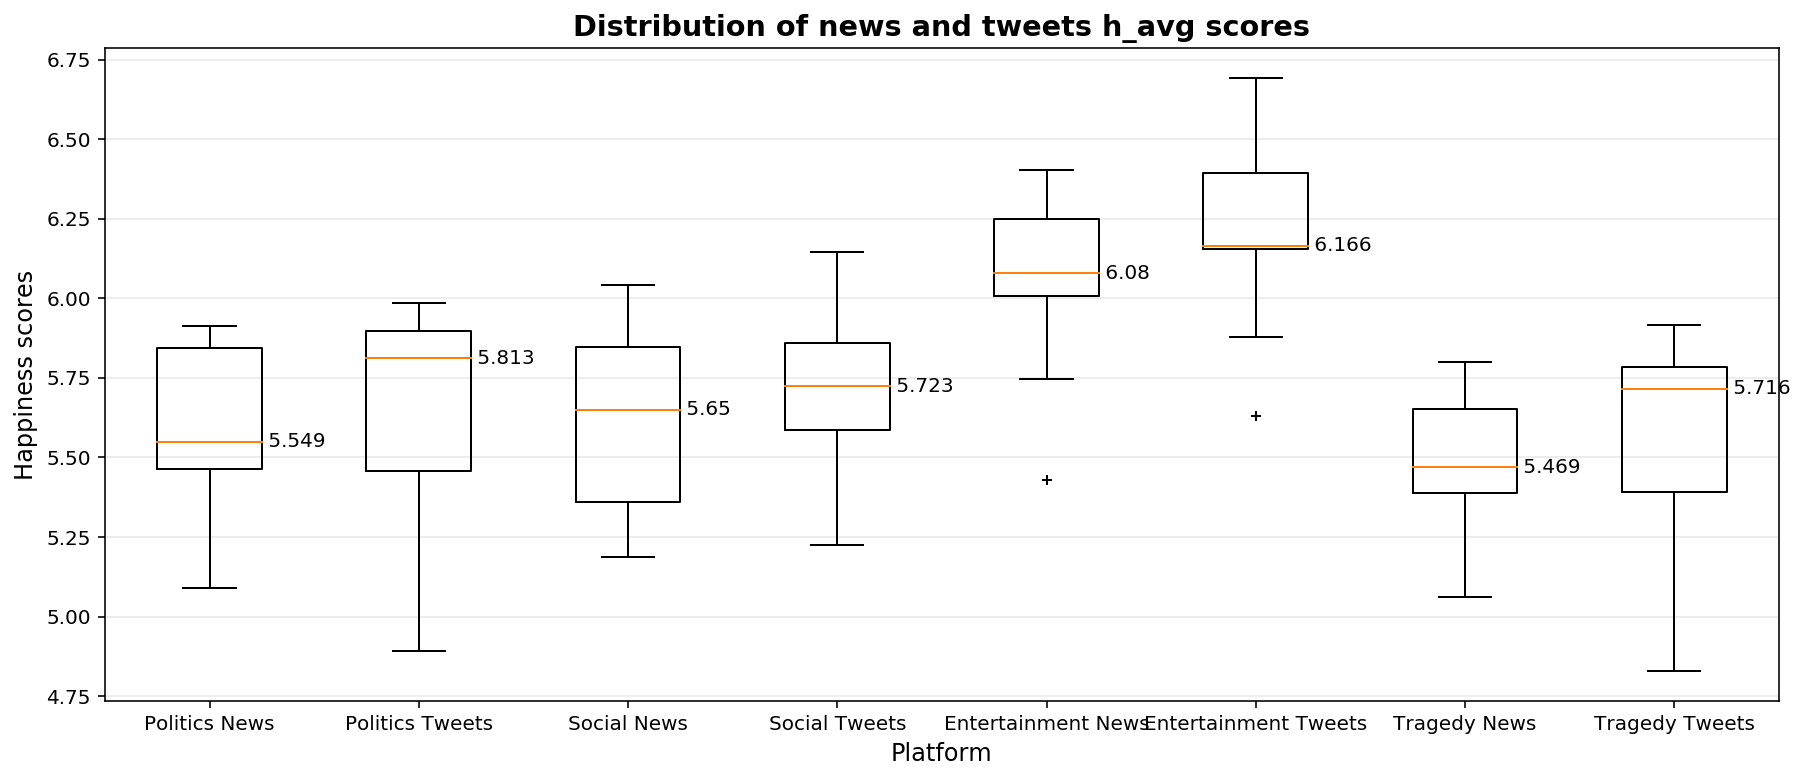

In [6]:
"""
Plot distribution of news_h_avg and tweets_h_avg by category
"""
if 1 == 1:
    '''
    Prepare data
    '''
    data = []
    for cat in ['politics', 'social', 'entertainment', 'tragedy']:
        cat_df = topics_h_avg_df[topics_h_avg_df['category'] == cat]
        data.extend([cat_df['news_h_avg'], cat_df['tweets_h_avg']])
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(15, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['Politics News', 'Politics Tweets', 'Social News', 'Social Tweets', 
                        'Entertainment News', 'Entertainment Tweets', 'Tragedy News', 'Tragedy Tweets'])
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Distribution of news and tweets h_avg scores', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('Platform', fontdict=label_fontdict)
    ax.set_ylabel('Happiness scores', fontdict=label_fontdict)
#     ax.set_yscale('log')
        
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, ' {:.4}'.format(y), horizontalalignment='left', verticalalignment='center')

### Check correlations

In [7]:
"""
Load data
"""
if 1 == 1:
    topics_h_avg_csv_file = os.path.join(config.FIG_DIR, 'topics_h_avg.csv')
    topics_h_avg_updated_csv_file = os.path.join(config.FIG_DIR, 'topics_h_avg.updated.csv')
    
    topics_h_avg_df = pd.read_csv(topics_h_avg_csv_file, sep='\t', quoting=csv.QUOTE_MINIMAL)
    topics_h_avg_updated_df = pd.read_csv(topics_h_avg_updated_csv_file, sep='\t', quoting=csv.QUOTE_MINIMAL)
    
    topic_lst_df = pd.DataFrame(config.MANUALLY_SELECTED_TOPICS_LST)
    
    topics_h_avg_df['category'] = topic_lst_df['category']
    topics_h_avg_updated_df['category'] = topic_lst_df['category']

In [8]:
"""
Pearson corr
"""
print('Original:')
display(topics_h_avg_df[['news_h_avg', 'tweets_h_avg']].corr(method='pearson'))
print('After removal duplicate tweets:')
display(topics_h_avg_updated_df[['news_h_avg', 'tweets_h_avg']].corr(method='pearson'))

Original:


,news_h_avg,tweets_h_avg
news_h_avg,1.000000,0.790032
tweets_h_avg,0.790032,1.000000


After removal duplicate tweets:


,news_h_avg,tweets_h_avg
news_h_avg,1.000000,0.687085
tweets_h_avg,0.687085,1.000000


In [9]:
"""
Spearman corr
"""
print('Original:')
display(topics_h_avg_df[['news_h_avg', 'tweets_h_avg']].corr(method='spearman'))
print('After removal duplicate tweets:')
display(topics_h_avg_updated_df[['news_h_avg', 'tweets_h_avg']].corr(method='spearman'))

Original:


,news_h_avg,tweets_h_avg
news_h_avg,1.000000,0.814932
tweets_h_avg,0.814932,1.000000


After removal duplicate tweets:


,news_h_avg,tweets_h_avg
news_h_avg,1.000000,0.729321
tweets_h_avg,0.729321,1.000000


In [10]:
"""
Pearson corr by category
"""
if 1 == 1:
    print('Pearson corrs')
    print('Original:')
    for cat in ['politics', 'social', 'entertainment', 'tragedy']:
        cat_df = topics_h_avg_df[topics_h_avg_df['category'] == cat]
        cat_df_corr = cat_df[['news_h_avg', 'tweets_h_avg']].corr(method='pearson')
        print('Topics category: {}'.format(cat))
        print(cat_df_corr)
        print('')
        
    print('After removal duplicate tweets:')
    for cat in ['politics', 'social', 'entertainment', 'tragedy']:
        cat_df = topics_h_avg_updated_df[topics_h_avg_df['category'] == cat]
        cat_df_corr = cat_df[['news_h_avg', 'tweets_h_avg']].corr(method='pearson')
        print('Topics category: {}'.format(cat))
        print(cat_df_corr)
        print('')

Pearson corrs
Original:
Topics category: politics
              news_h_avg  tweets_h_avg
news_h_avg      1.000000      0.681319
tweets_h_avg    0.681319      1.000000

Topics category: social
              news_h_avg  tweets_h_avg
news_h_avg      1.000000      0.570608
tweets_h_avg    0.570608      1.000000

Topics category: entertainment
              news_h_avg  tweets_h_avg
news_h_avg      1.000000      0.422557
tweets_h_avg    0.422557      1.000000

Topics category: tragedy
              news_h_avg  tweets_h_avg
news_h_avg       1.00000       0.72168
tweets_h_avg     0.72168       1.00000

After removal duplicate tweets:
Topics category: politics
              news_h_avg  tweets_h_avg
news_h_avg      1.000000      0.560147
tweets_h_avg    0.560147      1.000000

Topics category: social
              news_h_avg  tweets_h_avg
news_h_avg      1.000000      0.319429
tweets_h_avg    0.319429      1.000000

Topics category: entertainment
              news_h_avg  tweets_h_avg
news_h_avg

In [11]:
"""
Spearman corr by category
"""
if 1 == 1:
    print('Spearman corrs')
    print('Original:')
    for cat in ['politics', 'social', 'entertainment', 'tragedy']:
        cat_df = topics_h_avg_df[topics_h_avg_df['category'] == cat]
        cat_df_corr = cat_df[['news_h_avg', 'tweets_h_avg']].corr(method='spearman')
        print('Topics category: {}'.format(cat))
        print(cat_df_corr)
        print('')
    
    print('After removal duplicate tweets:')
    for cat in ['politics', 'social', 'entertainment', 'tragedy']:
        cat_df = topics_h_avg_updated_df[topics_h_avg_df['category'] == cat]
        cat_df_corr = cat_df[['news_h_avg', 'tweets_h_avg']].corr(method='spearman')
        print('Topics category: {}'.format(cat))
        print(cat_df_corr)
        print('')

Spearman corrs
Original:
Topics category: politics
              news_h_avg  tweets_h_avg
news_h_avg      1.000000      0.741758
tweets_h_avg    0.741758      1.000000

Topics category: social
              news_h_avg  tweets_h_avg
news_h_avg      1.000000      0.524476
tweets_h_avg    0.524476      1.000000

Topics category: entertainment
              news_h_avg  tweets_h_avg
news_h_avg       1.00000       0.17033
tweets_h_avg     0.17033       1.00000

Topics category: tragedy
              news_h_avg  tweets_h_avg
news_h_avg      1.000000      0.593407
tweets_h_avg    0.593407      1.000000

After removal duplicate tweets:
Topics category: politics
              news_h_avg  tweets_h_avg
news_h_avg      1.000000      0.703297
tweets_h_avg    0.703297      1.000000

Topics category: social
              news_h_avg  tweets_h_avg
news_h_avg      1.000000      0.335664
tweets_h_avg    0.335664      1.000000

Topics category: entertainment
              news_h_avg  tweets_h_avg
news_h_av